In [36]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)

img_dir = './img2/'

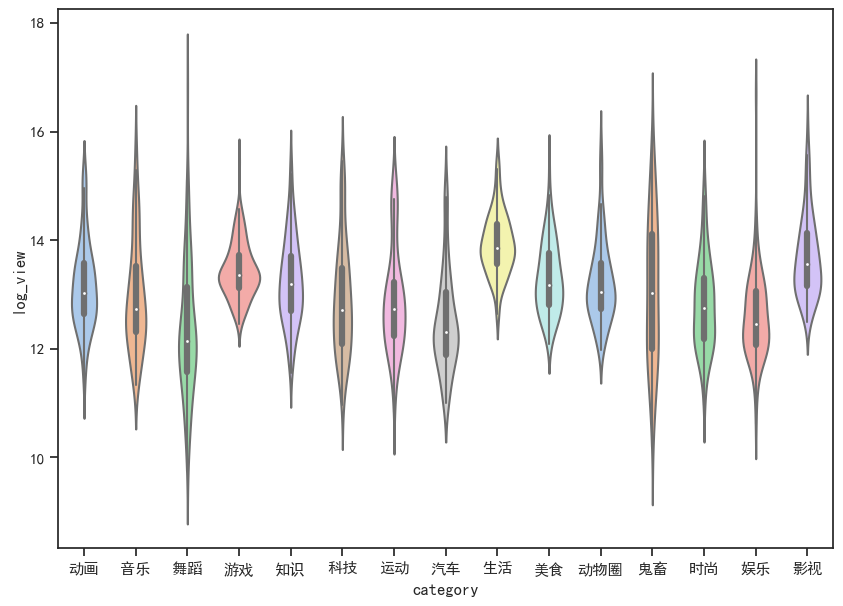

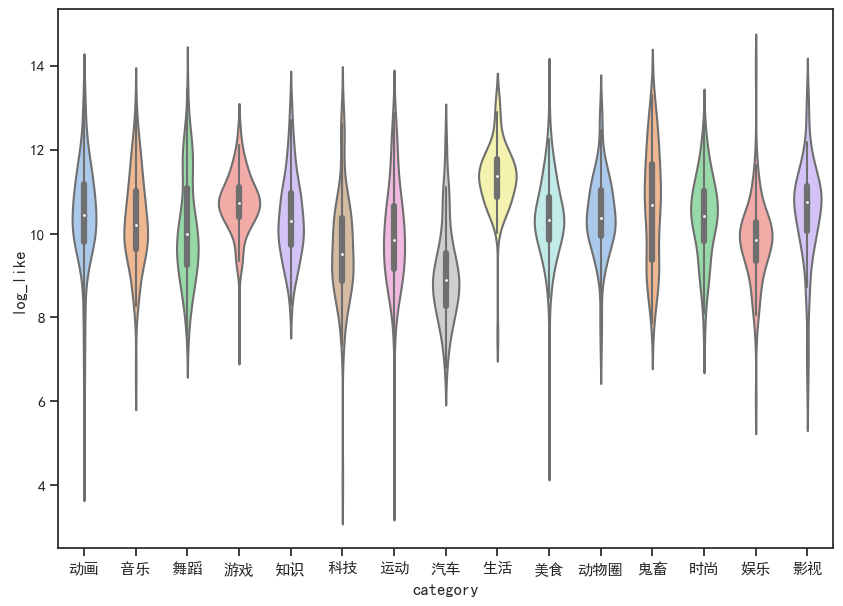

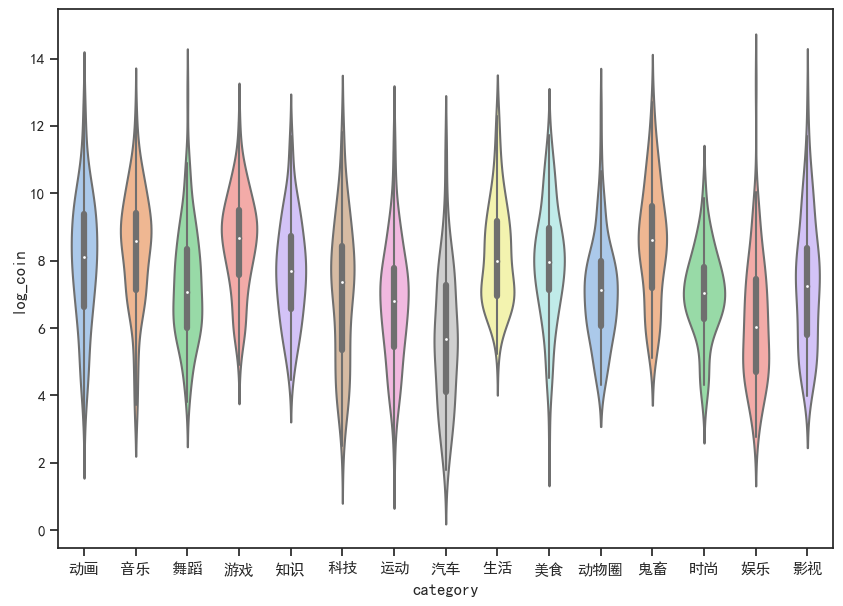

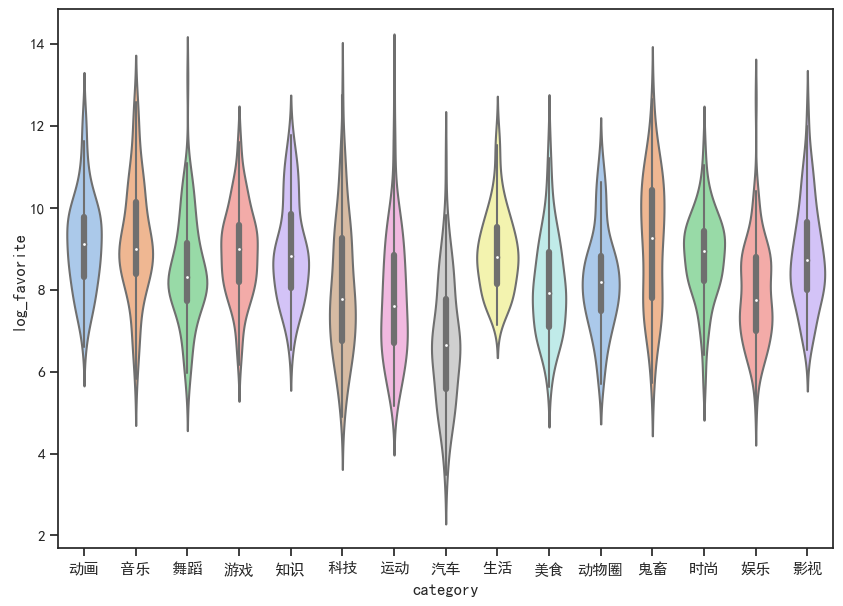

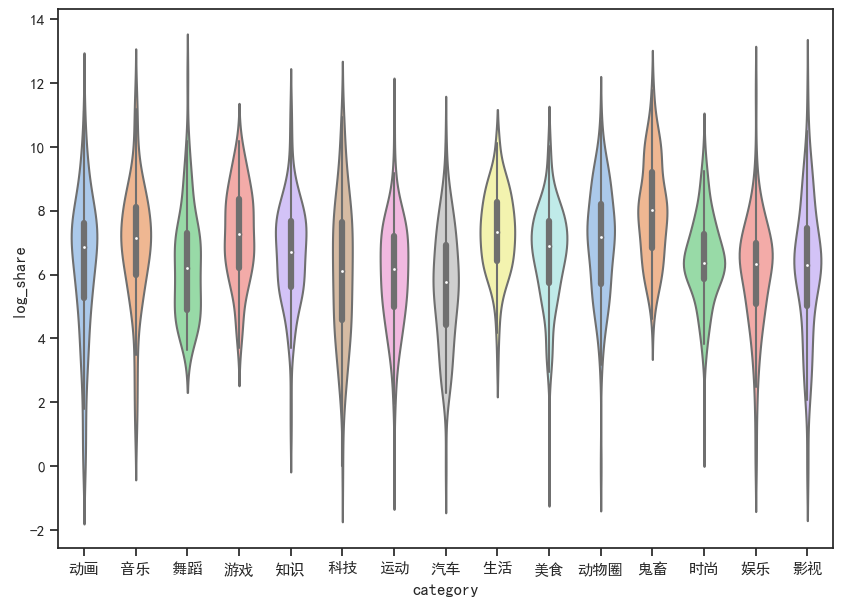

view      coin       like  favorite    share
category                                                    
动物圈        809051.87   6229.94   53913.57   8193.98  3517.18
动画         745418.50  14957.89   64537.73  19925.71  2962.54
娱乐         534137.79   7512.36   36347.94   7880.21  2294.09
影视        1249372.97  10630.55   65608.19  16464.44  3341.79
时尚         542689.94   2512.69   50365.55  11389.30  1522.49
汽车         435835.33   2730.34   17465.02   2659.98  1132.41
游戏         804827.27  12427.26   58224.59  13660.25  3456.91
生活        1320254.06  13904.67  113210.13  13766.60  3132.88
知识         790007.82   7554.45   56128.57  16962.11  2802.90
科技         733737.57   7624.85   37336.36  12639.27  3269.63
美食         765361.64   9886.20   51174.76   8109.30  1880.99
舞蹈         634751.62   8858.06   56834.09  14078.84  3885.05
运动         676050.94   4479.11   46489.03  11455.98  1481.24
音乐         785805.90  13674.67   54390.23  27675.63  4900.67
鬼畜        1071136.34  20752.90   93294.18  27644.50  9464.26

In [37]:
# sns.displot(df, x="log_view", hue="category", stat="density")
# sns.displot(df, x="log_like", hue="category", stat="density")
# sns.displot(df, x="log_coin", hue="category", stat="density")
# sns.displot(df, x="log_favorite", hue="category", stat="density")
# sns.displot(df, x="log_share", hue="category", stat="density")
import prjdata
import importlib
importlib.reload(prjdata)
df = prjdata.df()

def draw_violin_figure(y):
      plt.figure(figsize=(10, 7))
      sns.violinplot(df, x='category', y=f'log_{y}', palette='pastel')
      plt.savefig(f'{img_dir}/log{y}_violin_plot')
      plt.show()
draw_violin_figure('view')
draw_violin_figure('like')
draw_violin_figure('coin')
draw_violin_figure('favorite')
draw_violin_figure('share')
df[['category', 'view', 'coin', 'like', 'favorite', 'share']].groupby('category').mean()

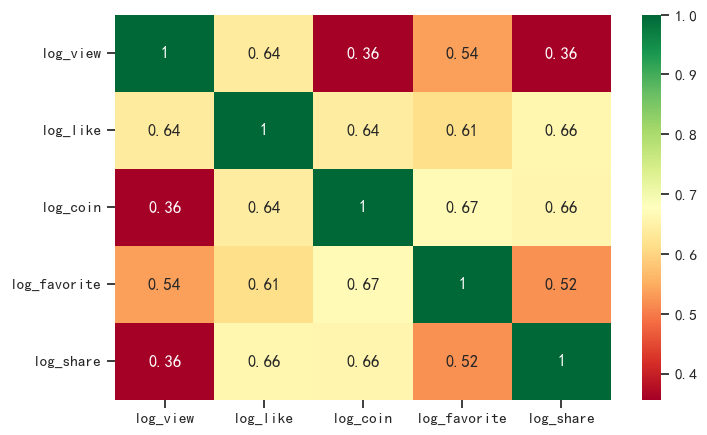

In [38]:
import prjdata
import importlib
importlib.reload(prjdata)
df = prjdata.df()
# corr_data = df[['view', 'like', 'coin', 'favorite', 'share']].corr()
# sns.heatmap(corr_data, cmap='RdYlGn', annot=True)
# plt.show()

log_corr_data = df[['log_view', 'log_like', 'log_coin', 'log_favorite', 'log_share']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(log_corr_data, cmap='RdYlGn', annot=True)
plt.savefig(f'{img_dir}/log_corr')
plt.show()

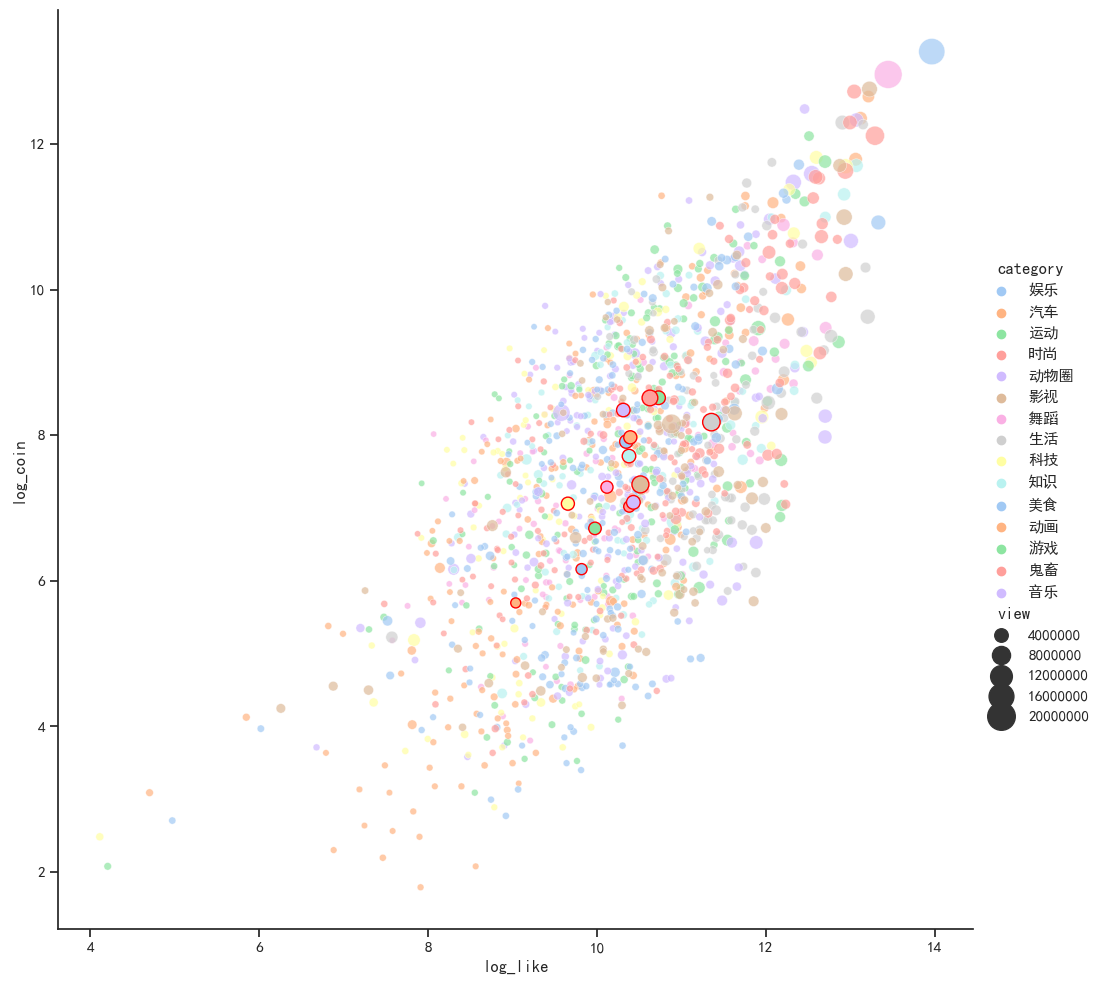

log_like  log_coin        view  log_coin/log_like
category                                                    
娱乐         9.817979  6.160968   534137.79           0.627519
汽车         9.038416  5.697173   435835.33           0.630329
运动         9.976914  6.720898   676050.94           0.673645
时尚        10.383799  7.020555   542689.94           0.676107
动物圈       10.431507  7.078381   809051.87           0.678558
影视        10.515336  7.324614  1249372.97           0.696565
舞蹈        10.118906  7.287245   634751.62           0.720161
生活        11.356017  8.180010  1320254.06           0.720324
科技         9.656042  7.060440   733737.57           0.731194
知识        10.379954  7.713739   790007.82           0.743138
美食        10.347696  7.912788   765361.64           0.764691
动画        10.395628  7.971438   745418.50           0.766807
游戏        10.730082  8.514592   804827.27           0.793525
鬼畜        10.628124  8.512252  1071136.34           0.800918
音乐        10.312315  8.346197   785805.90           0.809343

In [40]:
import prjdata
import importlib
importlib.reload(prjdata)
df = prjdata.df()

# plt.figure(figsize=(20, 20))
grouped = df[['category', 'log_like', 'log_coin', 'view']].groupby('category').mean()
grouped['log_coin/log_like'] = grouped['log_coin'] / grouped['log_like']
grouped = grouped.sort_values(by='log_coin/log_like')
sns.relplot(
      data=df,
      x="log_like", y="log_coin",
      hue="category", size="view",
      hue_order=grouped.index,
      height=10,
      alpha = 0.7,
      sizes=(20, 400),
      palette='pastel'
)
# sns.color_palette('muted', n_colors=12)

plt.scatter(grouped['log_like'], grouped['log_coin'], c=sns.color_palette('pastel', n_colors=15), edgecolors='red', linewidths=1, s=grouped['view']/10000 * 1.2)

plt.savefig(f'{img_dir}/log_like-log_coin_with_view_sized')
plt.show()

grouped

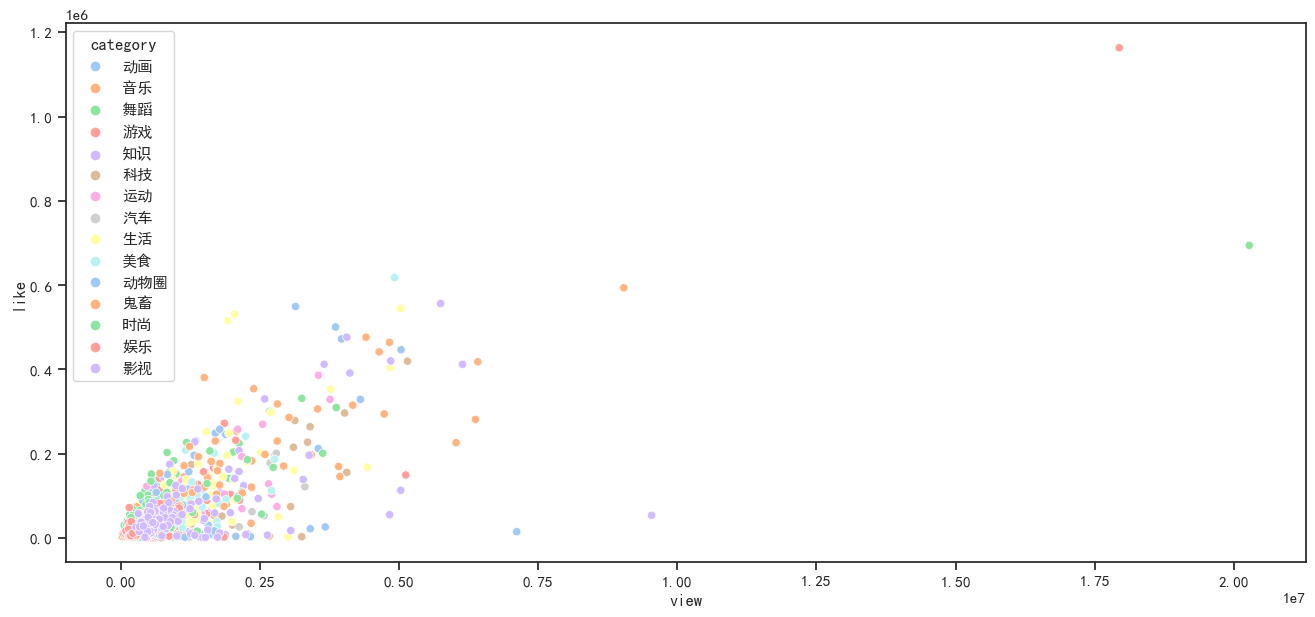

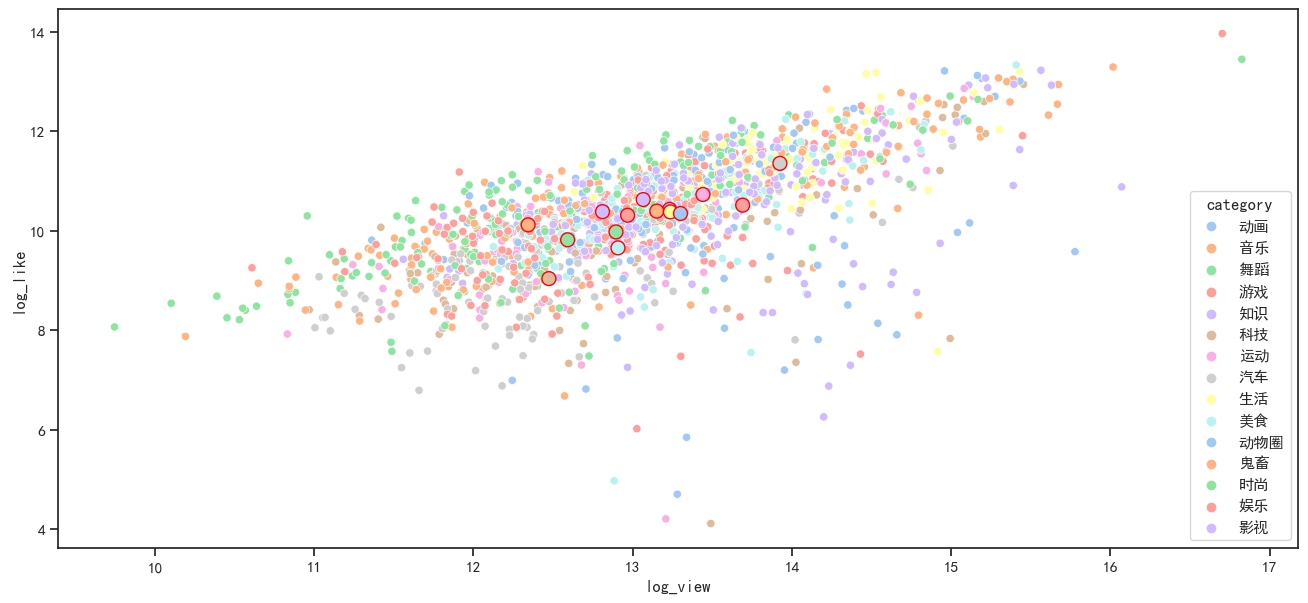

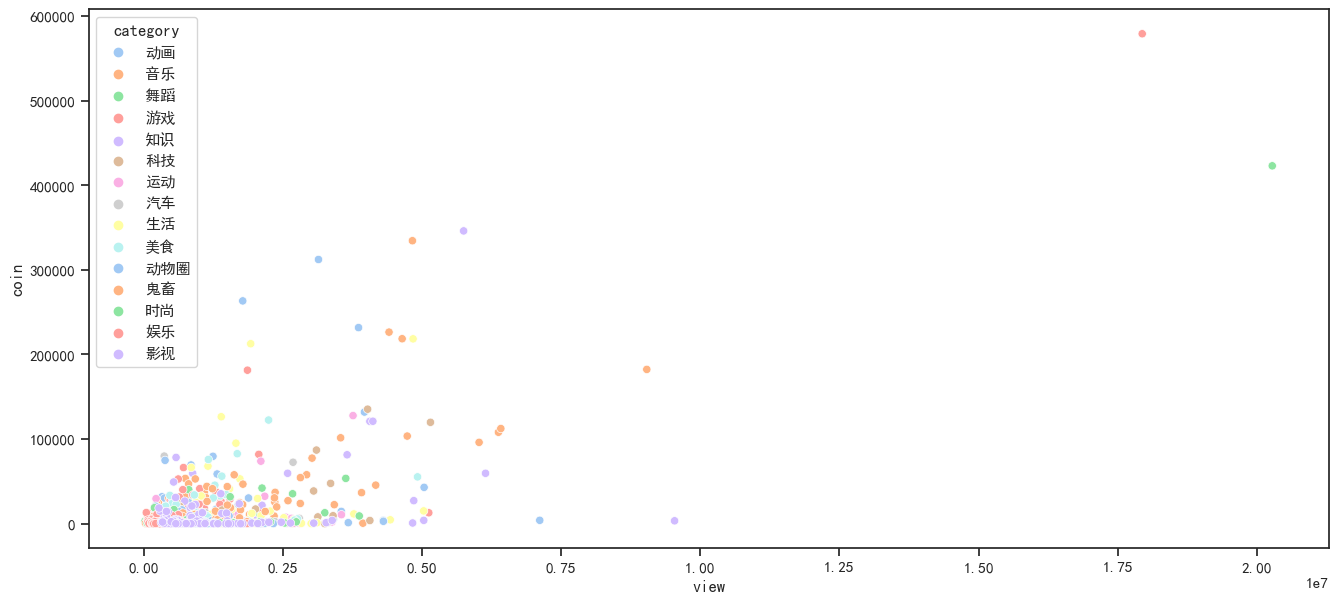

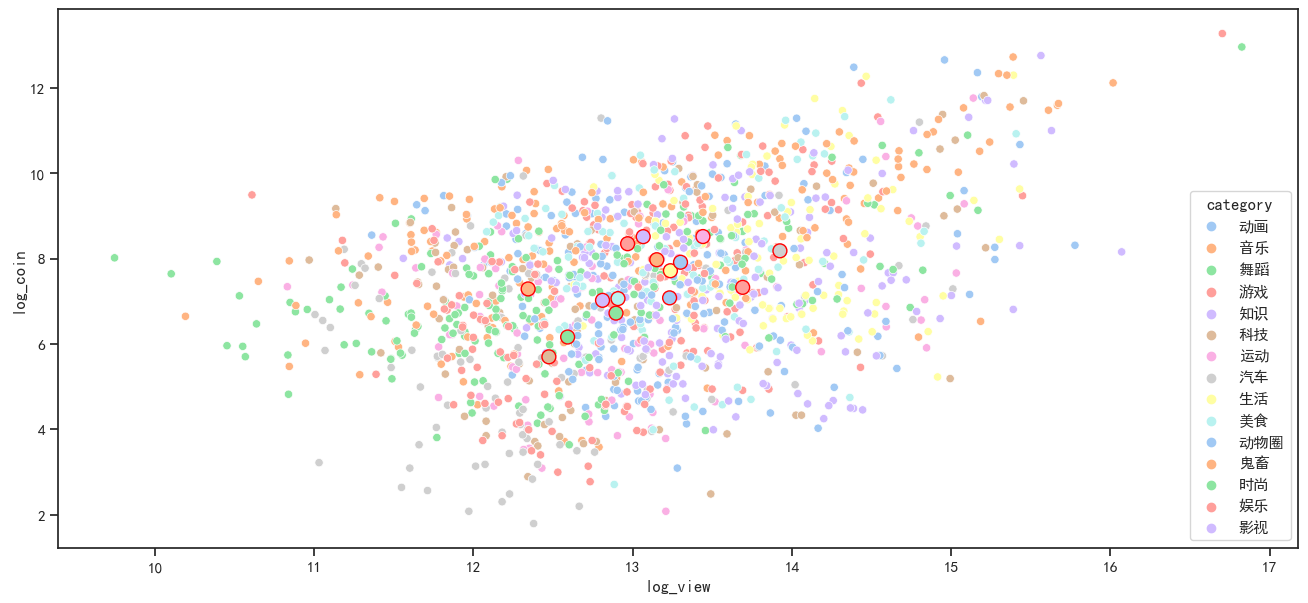

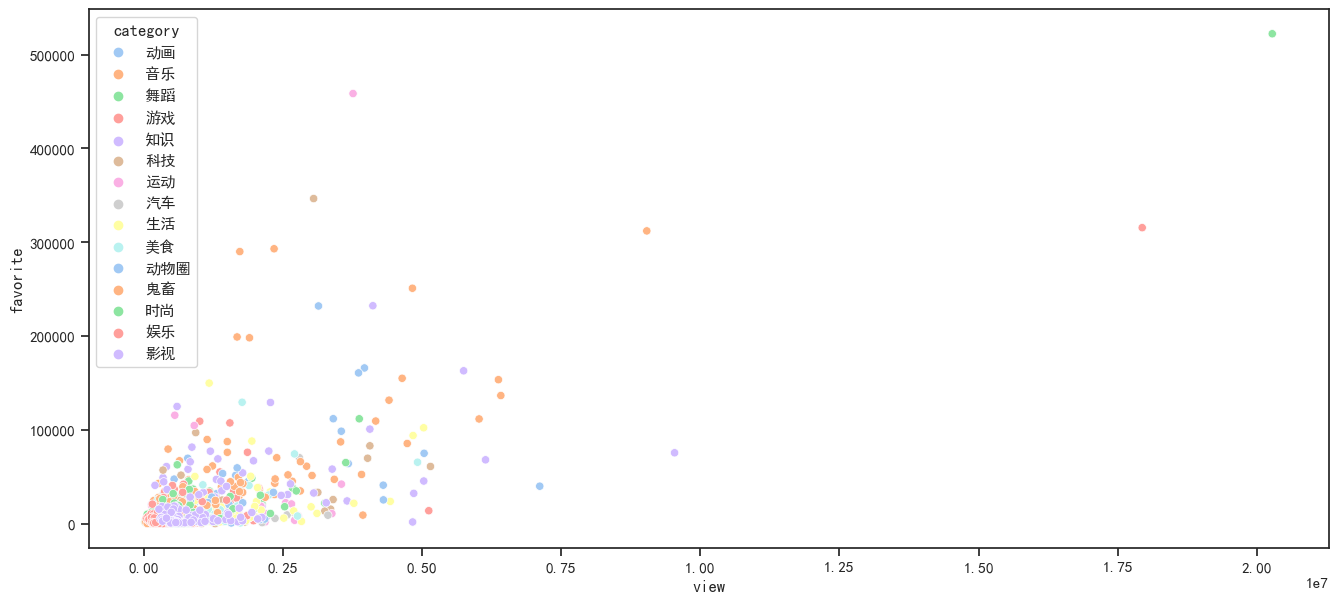

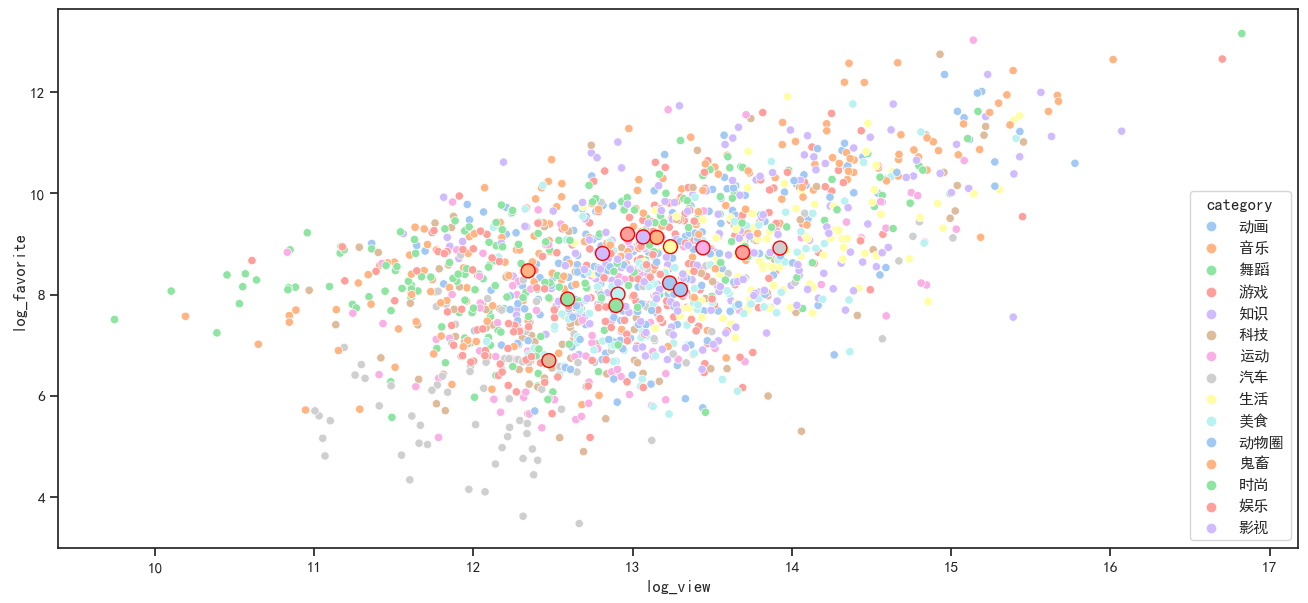

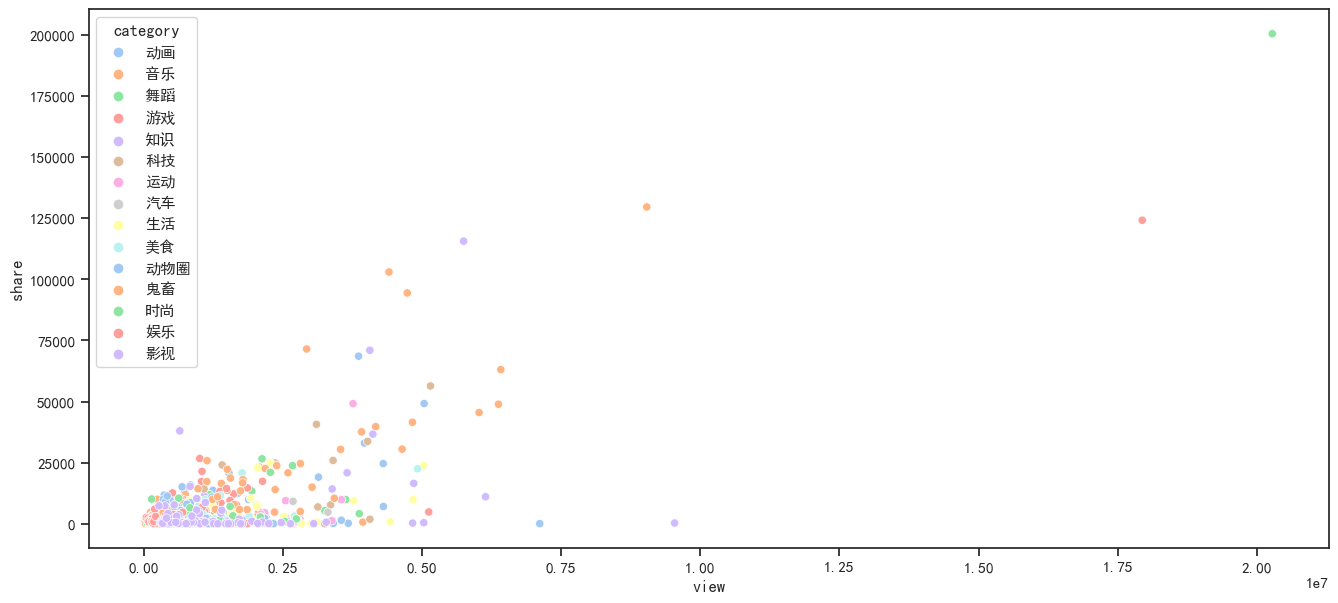

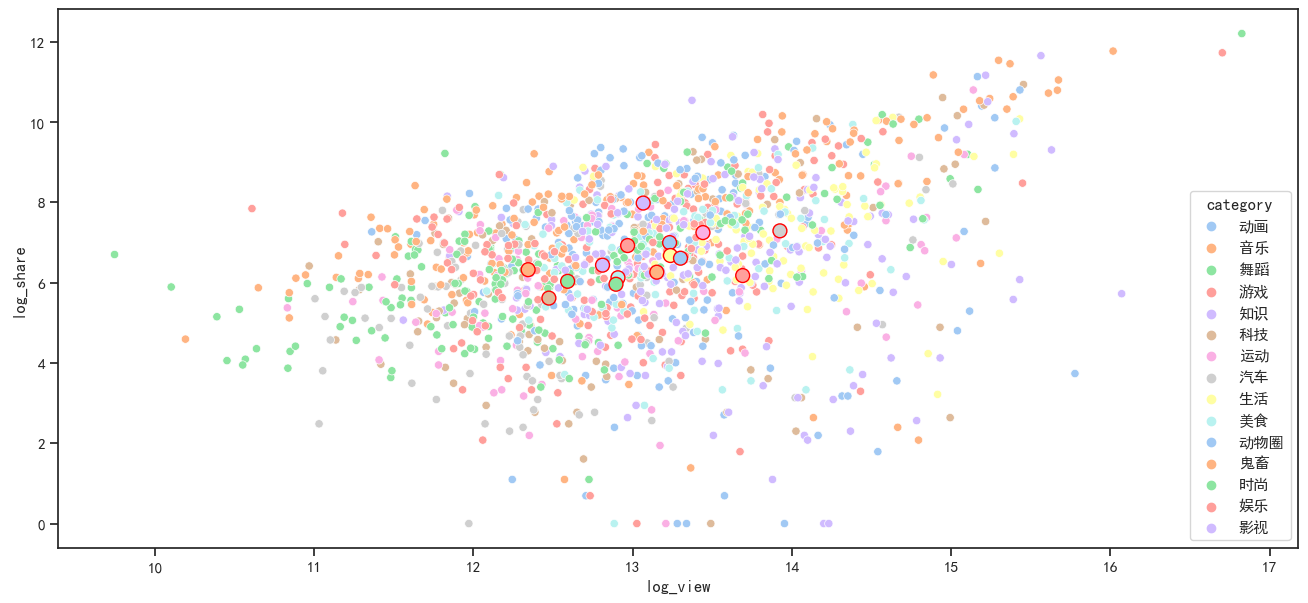

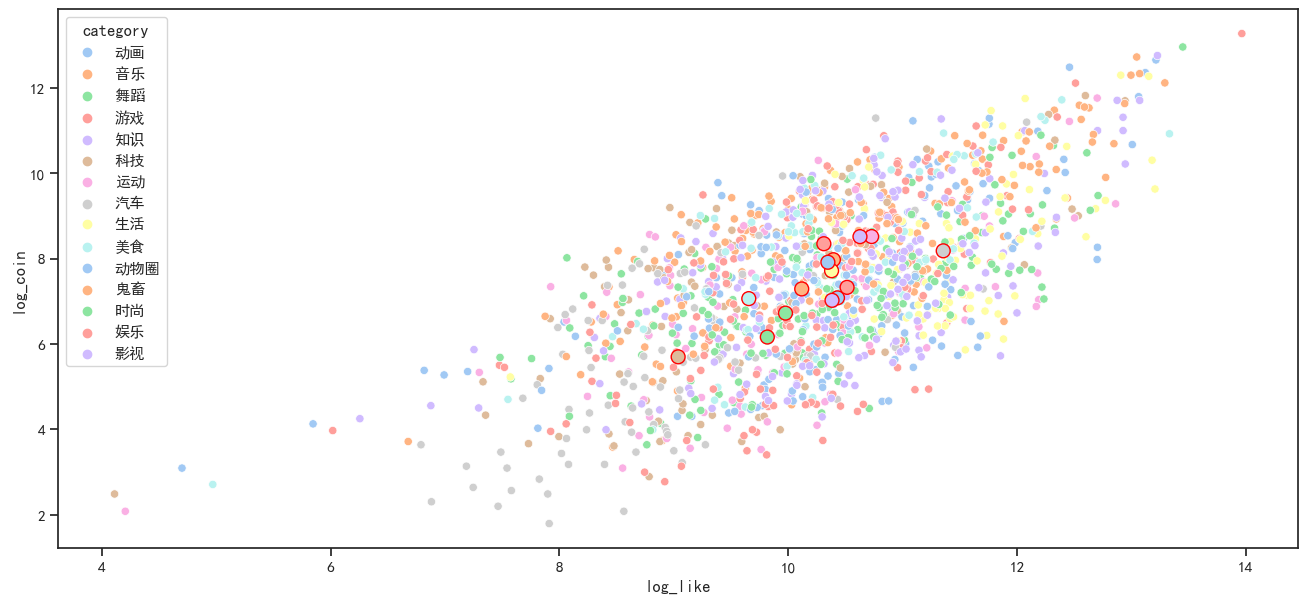

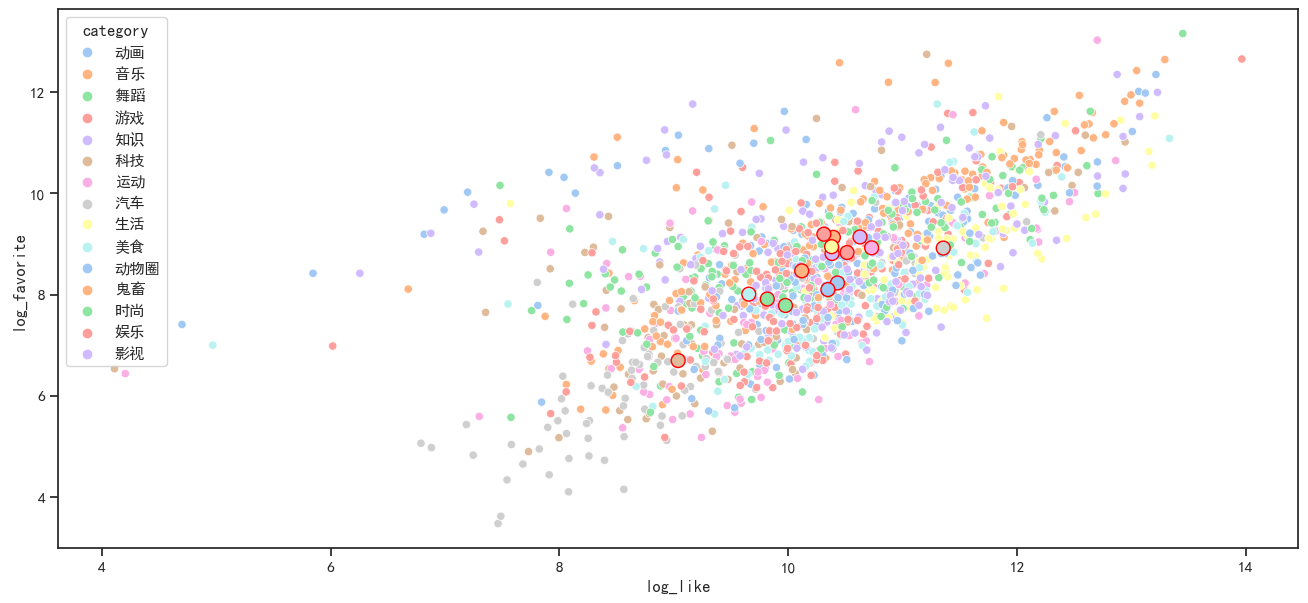

In [42]:
import prjdata
import importlib
importlib.reload(prjdata)
df = prjdata.df()

def draw_log_figure(x, y):
      plt.figure(figsize=(16, 7))
      sns.scatterplot(df, x=f'log_{x}', y=f'log_{y}', hue='category', palette='pastel')

      grouped = df[['category', f'log_{x}', f'log_{y}']].groupby('category').mean()

      plt.scatter(grouped[f'log_{x}'], grouped[f'log_{y}'], c=sns.color_palette('pastel', n_colors=15), edgecolors='red', linewidths=1, s=100)
      plt.savefig(f'{img_dir}/{x}-{y}-log')
      plt.show()


def draw_figure_and_log_figure(y):
      _df = df.copy()
      plt.figure(figsize=(16, 7))
      sns.scatterplot(df, x='view', y=y, hue='category', palette='pastel')
      plt.savefig(f'{img_dir}/view-{y}')
      plt.show()

      draw_log_figure('view', y)


draw_figure_and_log_figure('like')
draw_figure_and_log_figure('coin')
draw_figure_and_log_figure('favorite')
draw_figure_and_log_figure('share')

draw_log_figure('like', 'coin')
draw_log_figure('like', 'favorite')
# draw_log_figure('like')
# draw_log_figure('favorite')
# draw_log_figure('share')

## 词云

In [5]:
from prjdata import df
df[df['category']=='动画']

category  tid          bvid                      title  \
0        动画   27  BV12V4y127rr  黑深残拉满！美国奥特曼有多好看？《奥特灭伽》第一章   
1        动画   47  BV1ac41137fa      银狼：不要按啊啊啊啊啊——！！【星穹动画】   
2        动画   27  BV1vz4y1v7yY           关于我消失的这半年间都做了什么?   
3        动画   47  BV1qo4y1M7Kc  【星穹铁道】银狼：这年头好好做个直播这么难的吗？！   
4        动画  253  BV1yo4y1K7Ch   师傅的强大全靠徒弟想象，孙悟空被忽悠成超级赛亚猴   
..      ...  ...           ...                        ...   
95       动画   47  BV1zX4y1t78N           你们拉特兰刁民就是一群瞎子！！！   
96       动画   25  BV1mL411i7vo                    💜银狼乱撞~💜   
97       动画   86  BV1vN411C718              这什么奥特曼，长这么好看！   
98       动画   27  BV1u14y1Q7yC               “什么叫美漫打戏天花板”   
99       动画  253  BV1Xc41137AG     咒术回战225话情报分析，五条悟败在了哪里？   

                                                 desc     pubdate   owner_mid  \
0                                                 NaN  1686135900     7487399   
1   这一天，开拓者纠结银狼后背的那个按钮\n\nCV\n配导统筹-小鱼干\n银狼-越真\n开拓者...  1686133200     3211302   
2   2023年6月7号晚上的录播，回归直播！\n\n・・・‥‥……………………………………………...  1686147154      198297   
3   银狼直播间爆火事件始末\n\n————————\n本期CV：\n银狼/卡芙卡/三月七：@演员...  1686132000   287551041   
4                                                 NaN  1685938529   404063636   
..                                                ...         ...         ...   
95                                                  -  1686279993   457761794   
96  音乐：小鹿乱撞 - 永彬Ryan.B / 狄迪（D-DAY）\n\n人物模型：miHoYo/...  1686114725   517756701   
97                                                  -  1685703273  1870545846   
98                   《恶搞之家》的打戏从让人失望\n如果觉得精彩的话望给up主投个币  1686204926   484667289   
99                                                NaN  1686143910    77859059   

   owner_name     view  danmaku  ...  favorite   coin  share    like  dislike  \
0    努力的Lorre  1929687     1808  ...     43155  60277   6179  193031        0   
1        艾尔十六  1111695     2359  ...     26549  14589   3766  106087        0   
2        冰糖IO   920644     3680  ...     12220  24937   5422   71916        0   
3       一万根韭菜   709066      487  ...     20583  10271   3298  107084        0   
4        白琳漫馆  2312259      420  ...     82625   3978     94   15727        0   
..        ...      ...      ...  ...       ...    ...    ...     ...      ...   
95    帅哥伊斯买裤衩   252538      206  ...      1265    569    946   28040        0   
96       -L枫-   144681      145  ...      6600   1729    594   16844        0   
97     肌肉笨蛋骑士   498497      169  ...      3563    401    962   51729        0   
98       阿饭影漫   160876      453  ...      2442    358    385   11729        0   
99      天师张品漫   261701      256  ...       240    254    175    4607        0   

     log_view   log_like   log_coin  log_favorite  log_share  
0   14.472868  12.170606  11.006706     10.672554   8.728912  
1   13.921396  11.572015   9.588023     10.186747   8.233769  
2   13.732829  11.183254  10.124108      9.410829   8.598220  
3   13.471704  11.581369   9.237080      9.932221   8.101072  
4   14.653736   9.663134   8.288534     11.322068   4.543295  
..        ...        ...        ...           ...        ...  
95  12.439317  10.241387   6.343880      7.142827   6.852243  
96  11.882287   9.731750   7.455298      8.794825   6.386879  
97  13.119353  10.853774   5.993961      8.178358   6.869014  
98  11.988389   9.369820   5.880533      7.800573   5.953243  
99  12.474958   8.435332   5.537334      5.480639   5.164786  

[100 rows x 21 columns]

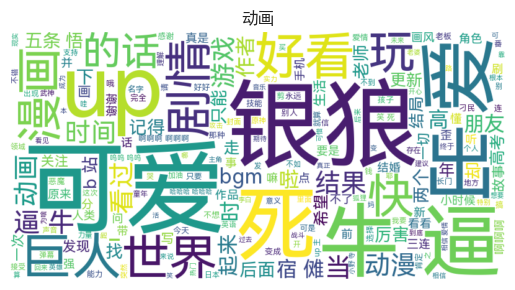

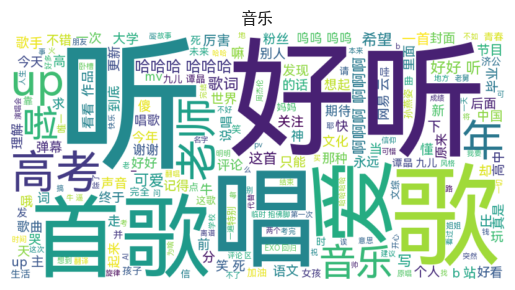

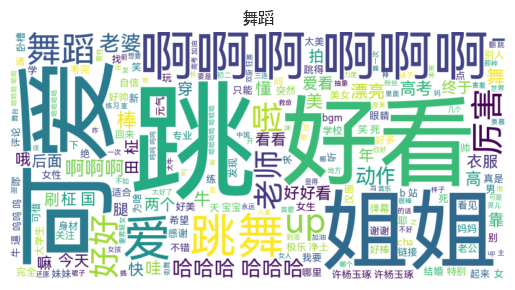

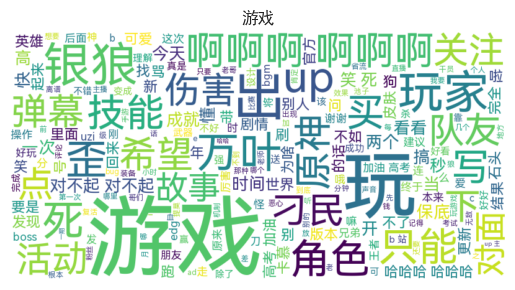

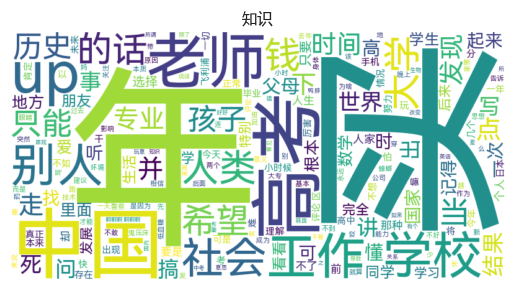

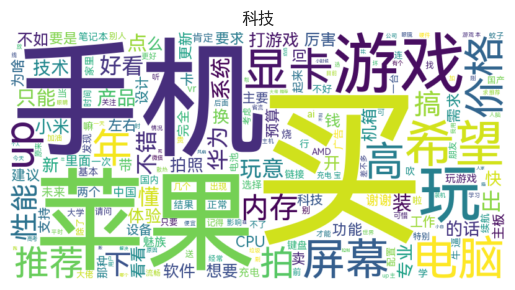

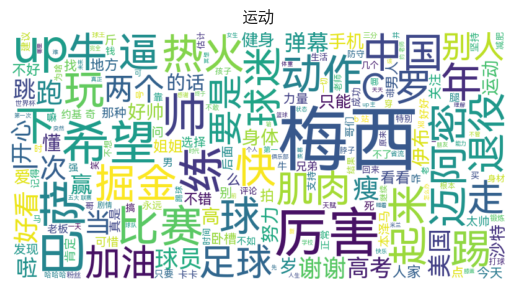

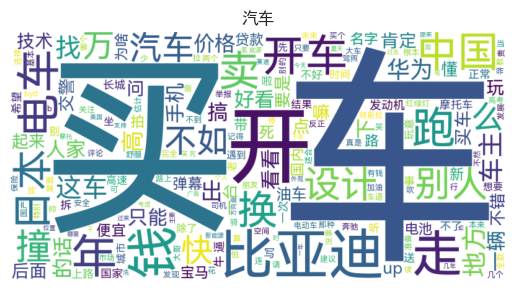

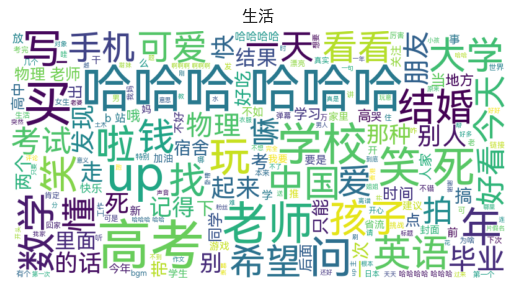

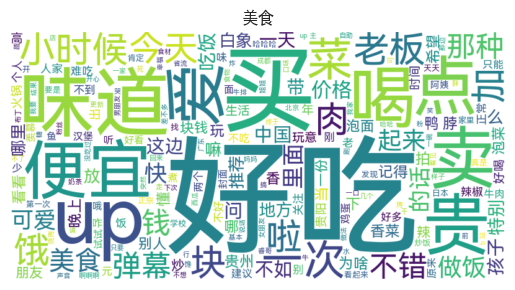

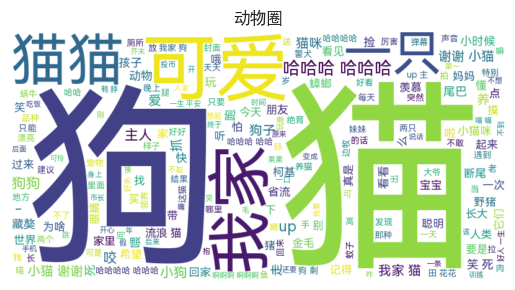

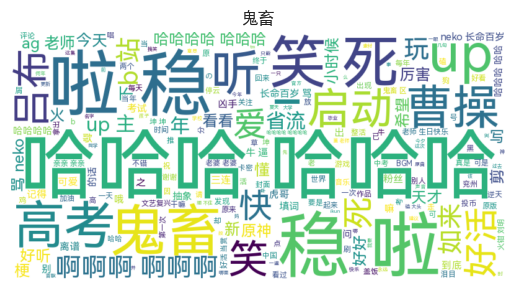

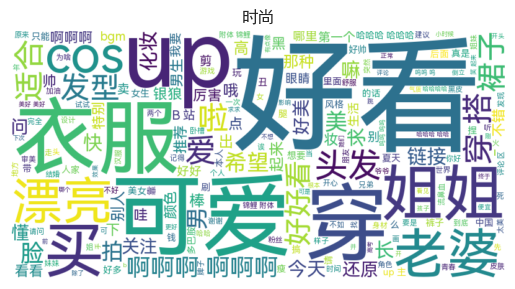

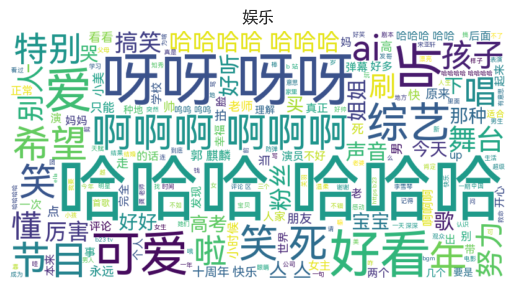

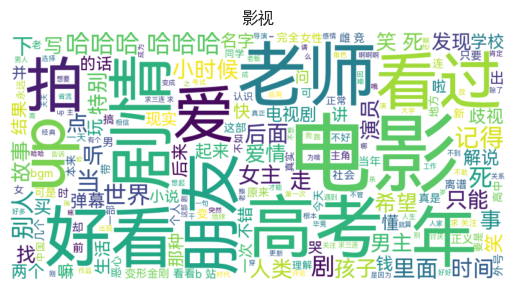

In [55]:
from itertools import product
import re
from pprint import pprint
from tqdm import tqdm
import requests
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import prjdata
import importlib
importlib.reload(prjdata)

rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)

def get_comments_by_partition(partition, refresh=True):
      if not refresh:
            with open(f'./{partition}区评论.txt', 'r', encoding='utf-8') as f:
                  return ' '.join(f.readlines())
      comments = []
      for bvid, pn in tqdm(list(product(df[df['category']==f'{partition}']['bvid'], range(10))), desc=f'{partition} comments'):
                  url = f'https://api.bilibili.com/x/v2/reply?pn={pn}&type=1&oid={bvid}&sort=0'
                  response = requests.get(url)
                  data = response.json()
                  try:
                        if data['data']['replies'] is not None and len(data['data']['replies']):
                              comments.extend([c['content']['message'] for c in data['data']['replies']])
                  except Exception as e:
                        print(e)

      res = ' '.join(comments)
      res = re.sub( r'\[.*?\]', '', res)
      with open(f'./{partition}区评论.txt', 'w', encoding='utf-8') as f:
            f.write(res)
      return res

stopwords = ['的','了','在','是','我','有','和','就','不','人','都','一','一个','上','也','很','到','说','要','去','你','会','着','没有','看','好','自己','这','给','他','们','来','没','能','去','能够','吗','能够','是否','我们','时候','如果','那','这个','可以','问题','这样','一些','通过','使用','方式','其中','一种','这些','需要','可以','方法','需要','为了','进行','这是','需要','帮助','因为', '被', '还', '吧', '已经', '啥', '想', '一', '真', '大概', '从来', '每次', '又', '啊', '跟', '但', '个', '为什么', '所以', '怎么', '这么', '那个', '但是', '感觉', '直接', '不是', '知道', '就是', '把', '真的', '什么', '现在', '呢', '还是', '还有', '然后', '应该', '对', '多', '让', '一下', '小', '比', '用', '抽', '叫', '才', '不能', '有点', '再', '只', '呀', '吃', '做', '它', '她', '他', '你们', '他们', '很多', '这种', '后', '那么','这里','所以','就是','或者','但是','不是','其他','没有','然后','现在','应该','而且','对于','之间','多少','之后','不同','可能','一样','很多','一起','一直','一部分','一种','不过','最后','一段时间','当然','不需要','不太','以及','只是','其中一部分','有些','例如','之前','不会','什么','那些','一点','不会','可能性','重要','不用','最好','一样','为什么','其他人','一些人','所以','再次','一定','全部','绝对','不行','开始','最初','进一步','如何','常见','同样','因此','不断','或许', '觉得', '是不是','多数','还是','如何','不要','因为','看到','这么','比如','事情','有人','没有人','任何','非常','一些事','为什么','怎么样','并且','大部分','从来没有','所有','然而','一般','并不','事实上','许多','例如','时候','确实','只有','不仅','不可能','一旦','以至于','这一点','并没有','如同','常常','大多数','并不','一丝不苟','可能会','更多','更少','不足','仅仅','甚至','一方面','另一方面','越来越','不再','不会','绝对不','常常','有时候','有时','一些情况','有时候','大概','总是','可以','不可以','有点','即使','每个','无法','无论','许多人','非常多','太多','不够','难以','首先','其次','最后','一样','有点儿','非常好','非常坏','相对','一直','一定','有可能','有可能','有可能','根本不','最近','现在','以前','从前','以后','在乎','不在乎','必须','必要','最重要','有时候','还有','另外','也许','基本上','绝对不会','有时候','很少','有很多','到处','很好','很坏','不同','相同','很大','不太大','越来越多','越来越少','越来越好','越来越坏','比较','非常重要','需要','不需要','有用','没有用','不明白','非常明白','非常重要','有用','没有用','不明白','非常明白','不重要','有用','没有用','不明白','不理解','知道','不知道','了解','不了解','同意','不同意','喜欢','不喜欢','认为','不认为','觉得','不觉得','感觉','不感觉','看法','不同看法','听说','不听说','听到','不听到','有道理','没道理','可以','不可以','有意义','没意义','有趣','没趣','有用','没用','重要','不重要','明显','不明显','明白','不明白','正确','不正确','错误','不错误','有效','无效','简单','复杂','容易','困难','完美','不完美', '这种', '不会', '太', '是不是', '你们', '他们', '视频', '完', '中', '等', '劲', '有没有', '过', '以为', '而', '好像', '居然', '像', '得', '里', '最', '为', '从', '出来', '谁', '更', '东西', '大', '打', '看着', '当时', '虽然', '大家', '其实', '与', '拿', '挺', '其实', '后面', '起来']

def generate_wordcloud(partition, refresh=True):
      partition_comments = get_comments_by_partition(partition, refresh)  # 以游戏分区为例
      word_list = jieba.cut(partition_comments)
      processed_text = ' '.join(word_list)
      wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='HarmonyOS_Sans_SC_Regular.ttf', stopwords=stopwords).generate(processed_text)
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.axis('off')
      plt.title(partition)
      plt.savefig(f'{img_dir}/{partition}词云')
      plt.show()

# 获取指定分区的用户评论

for id, category in prjdata.categories:
      generate_wordcloud(category, False)
